In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fast')
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [138]:
# TODO : Train and check the performance of classifiers on imbalanced dataset

In [139]:
# Import the training and testing data
X_train = pd.read_csv("../Data/X_train.csv")
X_test = pd.read_csv("../Data/X_test.csv")
y_train = pd.read_csv("../Data/y_train.csv")
y_test = pd.read_csv("../Data/y_test.csv")

In [328]:
def plot_metrics(clf, train_x, test_x, train_y, test_y, name=""):
    # make prediction
    model = clf
    model.fit(train_x, train_y)
    y_hat = model.predict(test_x)
    acc = accuracy_score(y_hat, test_y)*100
    b_acc = balanced_accuracy_score(y_hat, test_y) * 100
    # plot confusion matrix and accuracies
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    font_dict =  {'fontsize': 15, 'fontweight': 5, 'color': "black"}
    plt.rcParams.update({'font.size': 19})
    ax[0].set_title(f"Confusion Matrix for {name}", fontdict=font_dict)
    plot_confusion_matrix(model, test_x, test_y, colorbar=False, display_labels=['No', 'Yes'], ax=ax[0], cmap="tab20b")
    plt.title(f"Accuracy for {name}", fontdict=font_dict)
    plt.bar(x = ["Accuracy"], height=acc, label=f"{acc:.2f}%", color="#3d5a96")
    plt.bar(x = ["Balanced Accuracy"], height=b_acc, label=f"{b_acc:.2f}%", color="#873e96")
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.show()

# KNN

In [329]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

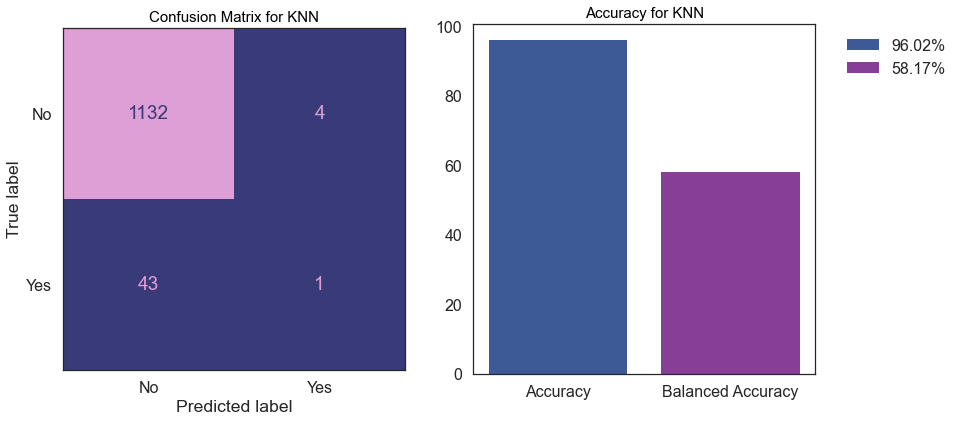

In [330]:
plot_metrics(KNN, X_train, X_test, y_train, y_test, name = "KNN")

In [331]:
knn_params = {'n_neighbors': [5, 6, 7, 8, 9, 10]}
knn_grid = GridSearchCV(estimator=KNN, param_grid=knn_params, cv=10, scoring="accuracy")
knn_grid.fit(X_train, y_train)
knn_grid.best_params_

{'n_neighbors': 10}

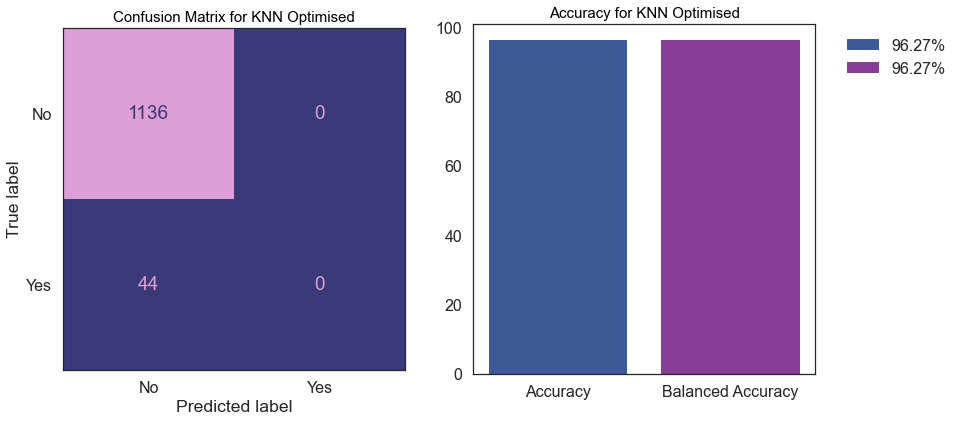

In [332]:
# OVERFIT!
KNN = KNeighborsClassifier(n_neighbors=10)
plot_metrics(KNN, X_train, X_test, y_train, y_test, name="KNN Optimised")

# Naive Bayes

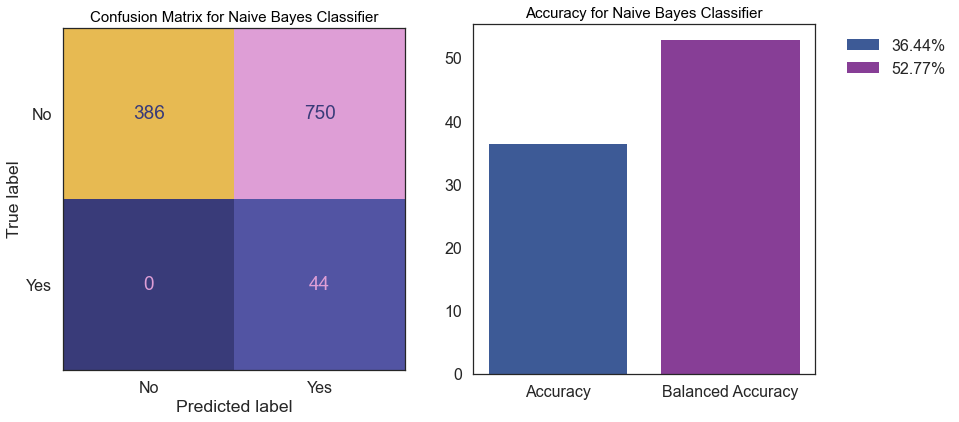

In [333]:
GNB = GaussianNB()
plot_metrics(GNB, X_train, X_test, y_train, y_test, name="Naive Bayes Classifier")

# Decision Tree

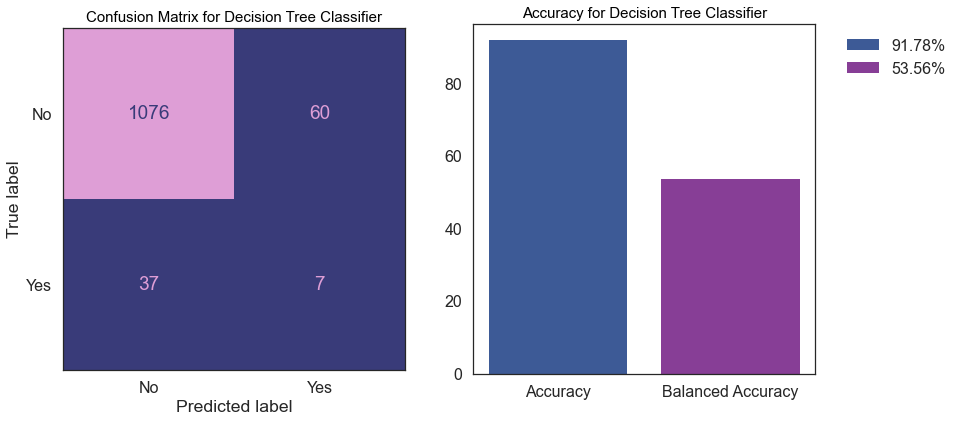

In [334]:
DT = DecisionTreeClassifier(max_depth=100)
plot_metrics(DT, X_train, X_test, y_train, y_test, name="Decision Tree Classifier")

In [341]:
dt_params = {'max_depth': [100, 200, 300, 400, 500, 600]}
dt_grid = GridSearchCV(estimator=DT, param_grid=dt_params, cv=10, scoring="accuracy")
dt_grid.fit(X_train, y_train)
dt_grid.best_params_

{'max_depth': 200}

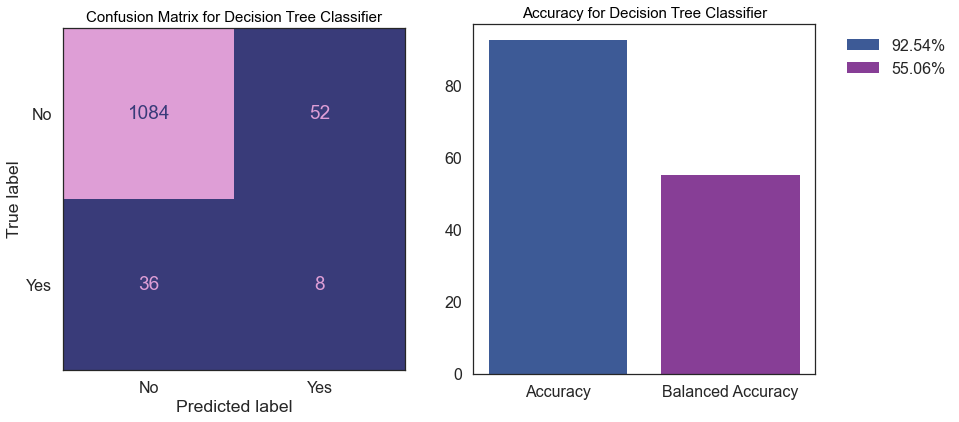

In [344]:
DT = DecisionTreeClassifier(max_depth=200)
plot_metrics(DT, X_train, X_test, y_train, y_test, name="Decision Tree Classifier")

# END